In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import math
# import xlrd3

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [2]:
file_names_outdoor = np.array(['outdoor_16-2.csv', 'outdoor_8-1.csv', 'outdoor_8-2.csv', 'outdoor_8-4.csv', 'outdoor_4-2.csv', 'outdoor_4-3.csv'])
file_names_outdoor = np.char.add("outdoor/", file_names_outdoor)

In [3]:
def make_data_outdoor(file_path):
    return pd.read_csv(
        file_path,
        sep=';',                # Ensure correct delimiter
        decimal=',',            # Handle decimal format
        encoding='utf-8',       # Adjust if needed
        skiprows=1              # Skip non-data header rows
    )

In [4]:
data_array_outdoor = []
i = 0
for name in file_names_outdoor:
    data_array_outdoor.append(make_data_outdoor(name))
    i += 1
data_array_outdoor[0].head()
N = len(data_array_outdoor)

m = 20.24124111641165 * U + -2.9186518521095843


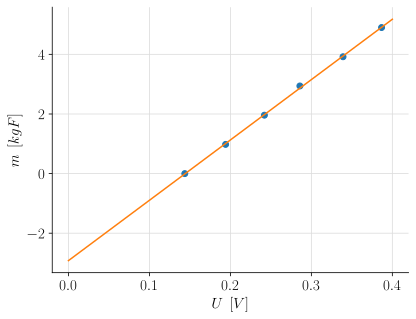

In [5]:
# калибровка тензодатчика
V = np.array([0, 1, 2, 3, 4, 5])
m = V * 980
U = np.array([143.7, 194.1, 242, 285.8, 339.1, 386.7])

fit_calibr = np.polyfit(U / 1000, m / 1000, 1)
x = np.array([0, 0.4])
y = fit_calibr[0] * x + fit_calibr[1]
print("m =", fit_calibr[0], "* U +", fit_calibr[1])

# график калибровки
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(U / 1000, m / 1000, 'o')
plt.plot(x, y)

plt.xlabel(r'$U\:\:[V]$')
plt.ylabel(r'$m\:\:[kgF]$')
plt.grid(color='gainsboro')

p = 2.1327772720647955 * U + -4.255941865177047


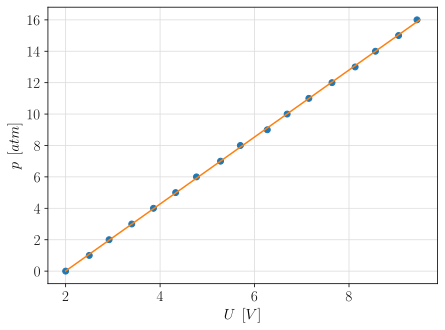

In [6]:
# калибровка давления
p = np.arange(0, 17, 1)
U = np.array([2, 2.50, 2.92, 3.40, 3.86, 4.33, 4.77, 5.28, 5.70, 6.27, 6.69, 7.15, 7.64, 8.13, 8.56, 9.05, 9.44])

fit_p_calibr = np.polyfit(U, p, 1)
x = np.array([2, 9.5])
y = fit_p_calibr[0] * x + fit_p_calibr[1]
print("p =", fit_p_calibr[0], "* U +", fit_p_calibr[1])

plt.plot(U, p, 'o')
plt.plot(x, y)

plt.xlabel(r'$U\:\:[V]$')
plt.ylabel(r'$p\:\:[atm]$')
plt.grid(color='gainsboro')

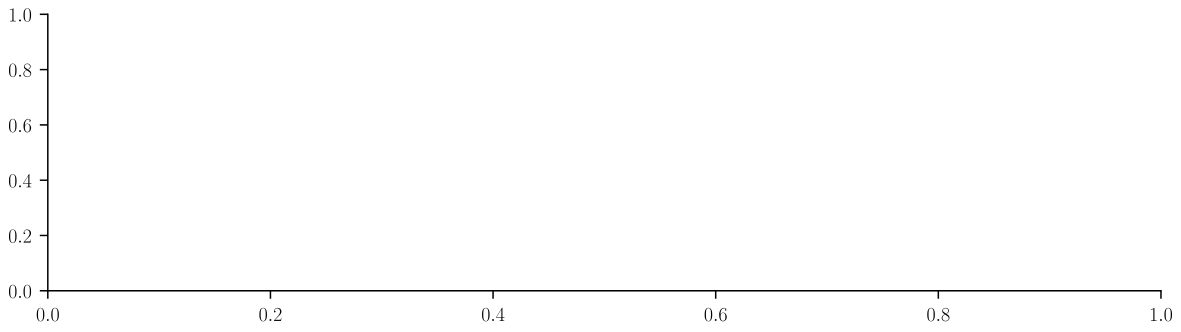

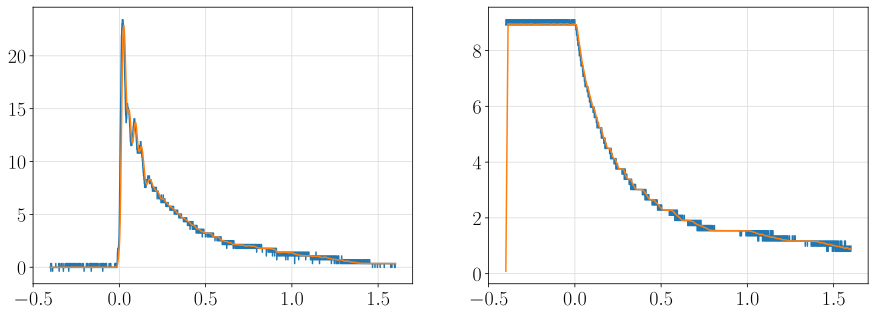

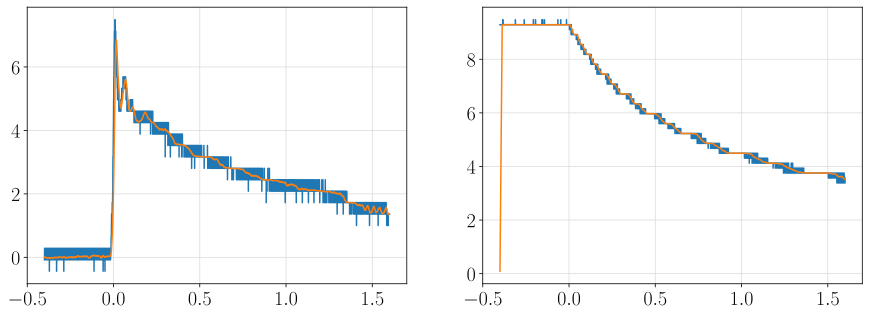

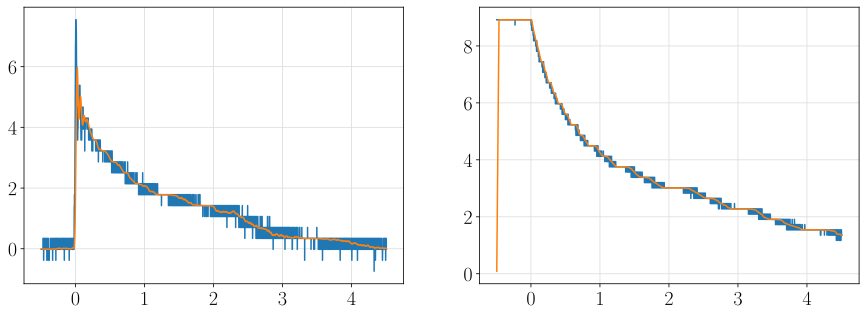

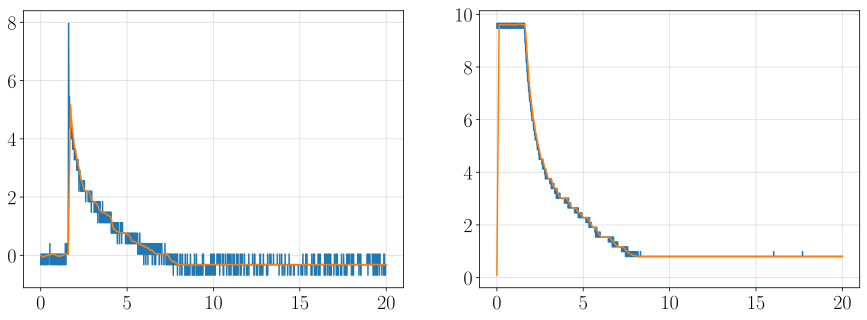

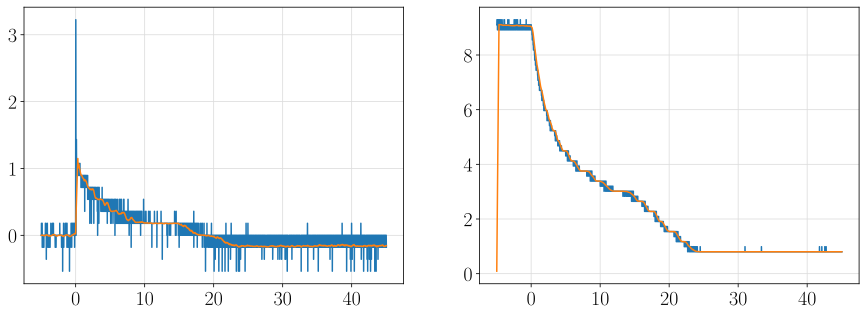

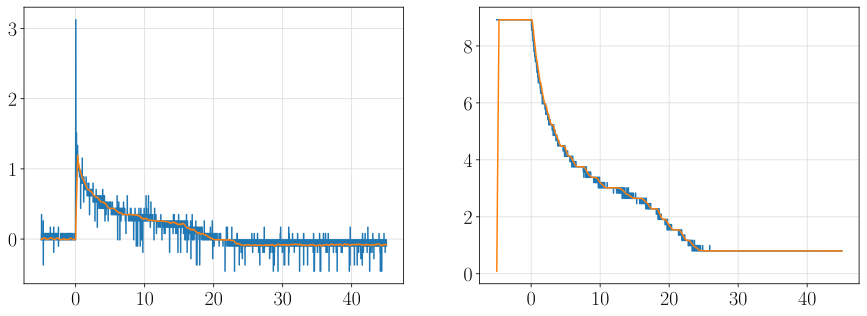

In [743]:
from scipy.signal import lfilter
from scipy.optimize import curve_fit

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
# plt.rcParams['text.latex.preamble'] = r'\boldmath'/
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [15, 5]
# plt.rc('font', family='Times New Roman')

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax_width = 1.5
ax.spines['left'].set_linewidth(ax_width)
ax.spines['bottom'].set_linewidth(ax_width)
ax.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)

time_data = []
F_exp = [] # exp - raw experimental data
p_exp = []

F_filtered_data = []
p_filtered_data = []

for i in range(N):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    time = np.array(data_array_outdoor[i].iloc[:, 0])
    time_data.append(time)
    
    U_F = np.array(data_array_outdoor[i].iloc[:, 1])
    if i == 5:
        U_F = U_F / 1000
    
    U_p = np.array(data_array_outdoor[i].iloc[:, 2])
    p = fit_p_calibr[0] * U_p + fit_p_calibr[1] + 1
    p_exp.append(p)

    ax2.plot(time, p)
    
    n = 100  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    n2 = 100
    b2 = [1.0 / n2] * n2
    a = 1
    U_F_filtered = lfilter(b, a, U_F)
    p_filtered = lfilter(b2, a, p)
    p_filtered_data.append(p_filtered)

    U_F_0 = U_F_filtered[500:1000].mean()
    F = fit_calibr[0] * (U_F - U_F_0)
    F_exp.append(F)

    F_filtered = lfilter(b, a, F)
    F_filtered_data.append(F_filtered)

    ax1.plot(time, F)
    ax1.plot(time, F_filtered)
    ax2.plot(time, p_filtered)
    
    ax1.grid(color='gainsboro')
    ax2.grid(color='gainsboro')


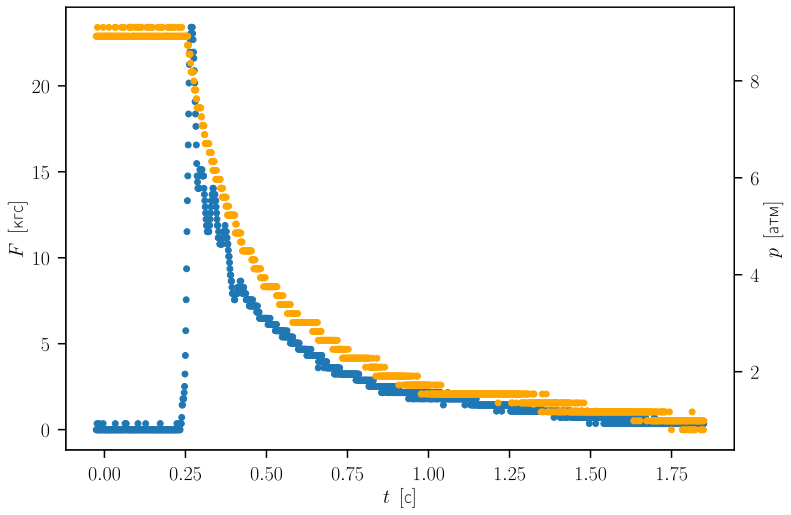

In [791]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
# plt.rcParams['text.latex.preamble'] = r'\boldmath'/
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [12, 8]
# plt.rc('font', family='Times New Roman')

fig, ax1 = plt.subplots()

# ax1 = plt.gca()
# ax1.spines[['right', 'top']].set_visible(False)
# ax_width = 1.5
# ax1.spines['left'].set_linewidth(ax_width)
# ax1.spines['bottom'].set_linewidth(ax_width)
# ax1.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)

# ax2 = plt.gca()
# ax2.spines[['right', 'top']].set_visible(False)
# ax2.spines['left'].set_linewidth(ax_width)
# ax2.spines['bottom'].set_linewidth(ax_width)
# ax2.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)

ax1 = plt.gca()
ax1.spines[['right', 'top']].set_visible(False)
ax_width = 1.5
ax1.spines['left'].set_linewidth(ax_width)
ax1.spines['bottom'].set_linewidth(ax_width)
ax1.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)

start_pF = 1000
step_pF = 10
ax1.plot(time_data[0][start_pF::step_pF] + 0.25, F_exp[0][start_pF::step_pF], 'o')

ax1.set_xlabel('$t\\:\\: [\\text{c}]$')
ax1.set_ylabel('$F\\:\\:[\\text{кгс}]$')

ax2 = ax1.twinx()
ax2 = plt.gca()
# ax2.spines[['right', 'top']].set_visible(False)
ax2.spines['right'].set_linewidth(ax_width)
ax2.spines['top'].set_linewidth(ax_width)
ax2.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)
ax2.plot(time_data[0][start_pF::step_pF] + 0.25, p_exp[0][start_pF::step_pF], 'o', color='orange')
# ax2.set_yscale(PowerScale(axis='y', exponent=0.5))
# ax2.set_ylim(1, 9)\
# ax2.set_yticks(np.arange(1, 9, 1)-1)
# ax2.set_ytic(np.arange(1, 9, 1))
# ax2.set_yticklabels(np.arange(1, 9, 1))
# ax2.set_y
# ax2.spines['right'].set_position(('axes', 1.2))
# ax2.set_xlabel('$t\\:\\: [\\text{c}]$')
ax2.set_ylabel('$p\\:\\:[\\text{атм}]$')

plt.savefig('F_p_vs_t.svg', bbox_inches='tight')

[array([1.97015578, 0.7533894 ]), array([0.66579694, 0.0120945 ]), array([0.6313468 , 0.02294003]), array([0.60154892, 0.180916  ]), array([ 0.17722987, -0.20752241]), array([ 0.14540079, -0.03139779])]


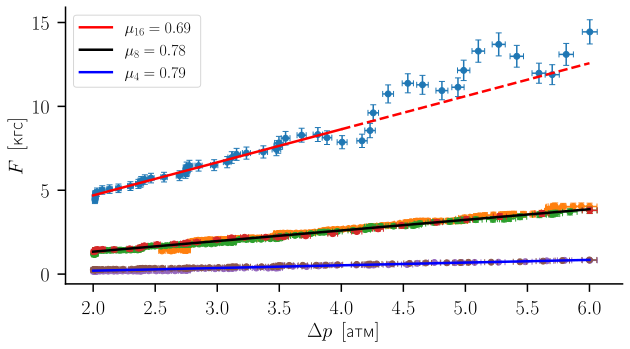

In [703]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
# plt.rcParams['text.latex.preamble'] = r'\boldmath'/
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]
# plt.rc('font', family='Times New Roman')

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax_width = 1.5
ax.spines['left'].set_linewidth(ax_width)
ax.spines['bottom'].set_linewidth(ax_width)
ax.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)

fit_pF = []
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for i in range(N):
    p_start = 7 - 1
    p_end = 3 - 1

    p = p_filtered_data[i][500:] - 1
    F = F_filtered_data[i][500:]
    start = np.abs(p - p_start).argmin()
    end = np.abs(p - p_end).argmin()
    step_1 = 50
    # plt.plot(p[start:end:step_1], F[start:end:step_1], 'o') # , linewidth=1, linestyle='--'
    plt.errorbar(p[start:end:step_1], F[start:end:step_1], xerr=p[start:end:step_1]*0.01 ,yerr=F[start:end:step_1] * 0.05, fmt='o', capsize=3, zorder=i, color=colors[i % len(colors)])
    # plt.plot(p[start:end][800:], F[start:end][800:], linewidth=1, linestyle='--')
    if i == 0:
        fit_pF.append(np.polyfit(p[start:end][800:], F[start:end][800:], 1))
    elif i == 1:
        fit_pF.append(np.polyfit(p[start:end][:5500], F[start:end][:5500], 1))
    else:
        fit_pF.append(np.polyfit(p[start:end], F[start:end], 1))

print(fit_pF)

x = np.array([3 - 1, 5 - 1])
k_16 = fit_pF[0][0]
b_16 = fit_pF[0][1]
y_16 = k_16 * x + b_16
plt.plot(x, y_16, linewidth=2.5, label=r"$\mu_{}={}$".format({16}, 0.69), zorder=i + 1, color='red') #round(k_16, 2)
plt.plot(np.array([4, 6]), k_16 * np.array([4, 6]) + b_16, color='red', linestyle='--', linewidth=2.5)

x = np.array([3 - 1, 7 - 1])
k_8 = np.array([fit_pF[1][0], fit_pF[2][0], fit_pF[3][0]]).mean()
b_8 = np.array([fit_pF[1][1], fit_pF[2][1], fit_pF[3][1]]).mean()
k_4 = np.array([fit_pF[4][0], fit_pF[5][0]]).mean()
b_4 = np.array([fit_pF[4][1], fit_pF[5][1]]).mean()
y_8 = k_8 * x + b_8
y_4 = k_4 * x + b_4
plt.plot(x, y_8, linewidth=2.5, label=r"$\mu_{}={}$".format({8}, 0.78), zorder=i + 2, color='black') #round(k_8, 2)
plt.plot(x, y_4, linewidth=2.5, label=r"$\mu_{}={}$".format({4}, 0.79), zorder=i + 3, color='blue') #round(k_4, 2)

plt.xlabel('$\\Delta p\\:\\: [\\text{атм}]$')
plt.ylabel('$F\\:\\:[\\text{кгс}]$')
plt.legend()

# plt.grid(color='gainsboro')

# plt.savefig("F_vs_p.pdf", bbox_inches='tight')
plt.savefig("F_vs_p.svg", bbox_inches='tight')

In [663]:
S_16 = np.pi * (0.016)**2 / 4
S_8 = np.pi * (0.008)**2 / 4
S_4 = np.pi * (0.004)**2 / 4

In [10]:
mu_16 = (k_16 * 9.8 / 1e5 / (2 * S_16))**0.5
mu_16

0.6929204837532699

In [11]:
mu_8 = (k_8 * 9.8 / 1e5 / (2 * S_8))**0.5
mu_8

0.7854703946956497

In [12]:
mu_4 = (k_4 * 9.8 / 1e5 / (2 * S_4))**0.5
mu_4

0.7931054448974039

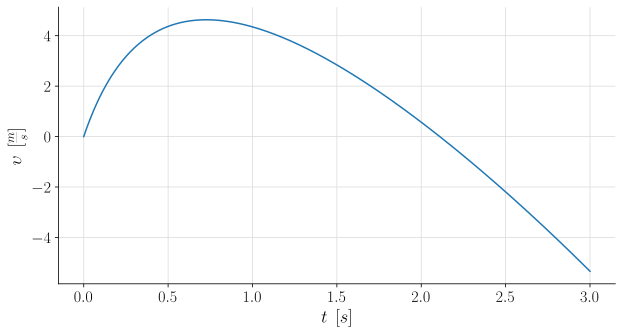

In [13]:
# моделирование уравнения Мещерского
from scipy.integrate import quad

p_a = 1e5
p_0 = 10 * 1e5
m_rocket = 0.1
# V_0 = 0.0002
V_rocket = 0.0022
rho = 1000
tau = 3
g = 9.8

def V(t):
    # коэффициенты из proc2
    a3 = 1.4925734527648119e-05
    a2 = -0.00016820662956579035
    a1 = 0.0008543202811112441
    a0 = 0.000415451133468293
    return a3 * t**3 + a2 * t**2 + a1 * t + a0

V_0 = V(0)

def p(t, alpha):
    return p_0 * (V_0 / V(t))**alpha

def du_dt(t, mu, alpha, S):
    return 2 * mu**2 * S * (p(t, alpha) - p_a) / (m_rocket + rho * (V_rocket - V(t))) - g

mu = mu_8
alpha = 1.4
S = S_8

N_step = 500
time = np.linspace(0, tau, num=N_step)
u = np.zeros(N_step)
for i in range(N_step):
    u[i], error = quad(du_dt, 0, time[i], args=(mu, alpha, S))

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(time, u)

plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$\upsilon\:\:[\frac{m}{s}]$')
plt.grid(color='gainsboro')

5.611647231599791


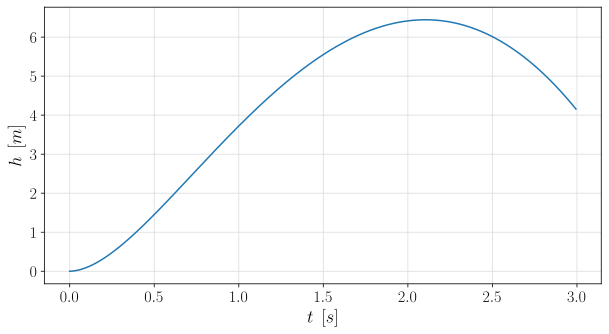

In [14]:
x = np.zeros(N_step - 1)
for i in range(1, N_step - 1):
    x[i] = x[i - 1] + (u[i + 1] + u[i]) / 2 * (time[i + 1] - time[i])

plt.plot(time[:N_step - 1], x)

plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$h\:\:[m]$')
plt.grid(color='gainsboro')

print(x[-1] + u[-1]**2 / (2 * g))

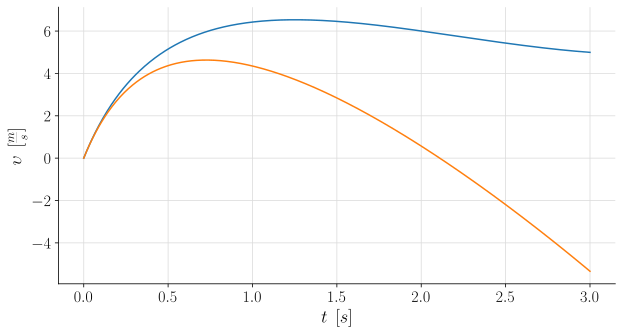

In [15]:
# моделирование уравнения Мещерского с силой сопротивления
from scipy.integrate import solve_ivp

p_a = 1e5
p_0 = 10 * 1e5
m_rocket = 0.1
# V_0 = 0.0002
V_rocket = 0.0022
rho = 1000
tau = 3
g = 9.8
k = 1 / 2 * 1.25 * np.pi * (0.085 / 2)**2 * 0.3

def V(t):
    # коэффициенты из proc2
    a3 = 1.4925734527648119e-05
    a2 = -0.00016820662956579035
    a1 = 0.0008543202811112441
    a0 = 0.000415451133468293
    return a3 * t**3 + a2 * t**2 + a1 * t + a0

V_0 = V(0)

def p(t, alpha):
    return p_0 * (V_0 / V(t))**alpha

def du_dt(t, u, mu, alpha, S):
    return (2 * mu**2 * S * (p(t, alpha) - p_a) - k * u**2) / (m_rocket + rho * (V_rocket - V(t))) - g

mu = mu_8
alpha = 1.2
S = S_8

# Начальные условия
t0 = 0
u0 = 0
N_step = 500

t_span = (t0, 3)
t_eval = np.linspace(t0, 3, N_step)

solution = solve_ivp(du_dt, t_span, [u0], args=(mu, alpha, S), t_eval=t_eval)

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(solution.t, solution.y[0])
plt.plot(time, u)

plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$\upsilon\:\:[\frac{m}{s}]$')
plt.grid(color='gainsboro')

In [16]:
def make_data_8_4(file_path):
    return pd.read_csv(
        file_path,
        sep=',',                # Ensure correct delimiter
        decimal='.',            # Handle decimal format
        encoding='utf-8',       # Adjust if needed
        skiprows=1              # Skip non-data header rows
    )

data_8_4 = make_data_8_4('pV_8-4_1.csv')
time_exp_8_4 = np.array(data_8_4.iloc[:, 0])
U_p_exp_8_4 = np.array(data_8_4.iloc[:, 2])
p_exp_8_4 = fit_p_calibr[0] * (U_p_exp_8_4 - 1.76)
p_exp_8_4[1000:2000].mean()

6.487975669698504

In [17]:
mu_8

0.7854703946956497

/tmp/ipykernel_794265/3496609093.py:49: RuntimeWarning: invalid value encountered in sqrt
  return -alpha * p / (V_0 * (p_0 / p)**(1 / alpha)) * mu * S * (2 * (p - p_a) / rho)**0.5


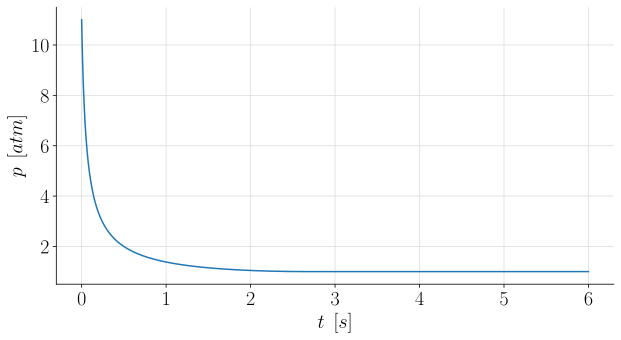

In [754]:
# моделирование уравнения Мещерского
from scipy.integrate import quad
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

p_a = 1e5
p_0 = 11 * 1e5 #(p_exp_8_4[1000:2000].mean() + 1) * 1e5
m_rocket = 0.2
# V_0 = 0.0002
V_rocket = 0.0012 #0.0022
rho = 1000

g = 9.8
alpha = 1.1
N_step = 7000

# mu = 0.8
# Cd = 0.6
# mu = 0.8 # norm? sbivka t1
# Cd = 0.38

# sbivka t1 
tau = 6
S = S_16
mu = 0.735
Cd = 0.09
angle = np.deg2rad(0)
V_start = np.array([0.000435])
flag_t = 1

# mu = 0.85 # sbivka t2
# Cd = 0.7
# angle = np.deg2rad(4)

# sbivka t2
# S = S_8
# tau = 5
# mu = 0.745
# Cd = 0.08
# angle = np.deg2rad(2)
# V_start = np.array([0.000419])
# flag_t = 2

# V_0 = V_rocket / 2 #0.000415451133468293
# V_start = np.linspace(0.0005, 0.0007, 100)


def dp_dt(t, p, alpha, mu, S, V_0):
    return -alpha * p / (V_0 * (p_0 / p)**(1 / alpha)) * mu * S * (2 * (p - p_a) / rho)**0.5

# Начальные условия
t0 = 0
p0 = p_0

t_span = (t0, tau)
t_eval = np.linspace(t0, tau, N_step)

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

p_array = []
time_array = []

for V_0 in V_start:
    solution = solve_ivp(dp_dt, t_span, [p0], args=(alpha, mu, S, V_0), t_eval=t_eval)
    
    plt.plot(solution.t, solution.y[0] / 1e5)
    p_array.append(interp1d(solution.t, solution.y[0], kind='linear'))
    time_array.append(solution.t)
    start_8_4 = 3200
    # plt.plot(time_exp_8_4[start_8_4:] - time_exp_8_4[start_8_4], p_exp_8_4[start_8_4:] + 1)
    
    plt.xlabel(r'$t\:\:[s]$')
    plt.ylabel(r'$p\:\:[atm]$')
    plt.grid(color='gainsboro')

359851.69975296163


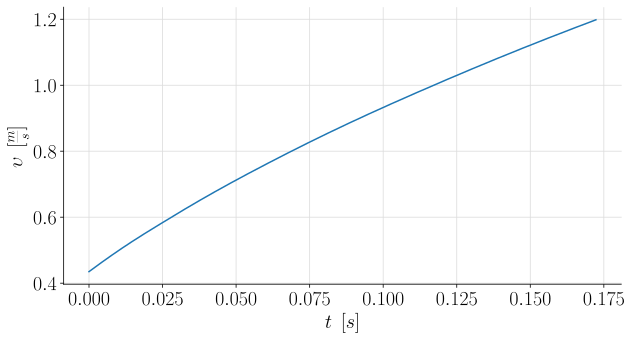

In [755]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

i = 0
u_array = []
time_array_2 = []
stop_solution_array = []
for V_0 in V_start:
    p = p_array[i]
    def V(t, alpha, V_0):
        return V_0 * (p_0 / p(t))**(1 / alpha)
    
    # plt.plot(solution.t, V(solution.t, alpha, V_0))
    stop = np.abs(np.array(V(solution.t, alpha, V_0)) - V_rocket).argmin()
    time = np.array(time_array[i])
    i += 1
    print(p(time[stop]))
    
    k = 1 / 2 * 1.25 * np.pi * (0.080 / 2)**2 * Cd
    
    def du_dt(t, u, mu, alpha, S, V_0):
        # if 
        u_mag = np.linalg.norm(u)
        # if t < 0.001:
        #     u_dir = np.array([0, 1])  
        # else:
        u_dir = u / u_mag
        # F_grav = np.array([0, -g])
        F_drag = -k * u_mag**2  * u_dir
        if t < time[stop]:
            m =  (m_rocket + rho * (V_rocket - V(t, alpha, V_0)))
            F_thrust = (2 * mu**2 * S * (p(t) - p_a)) * u_dir
            return (F_thrust + F_drag) / m  + np.array([0, -g])
        elif t >= time[stop]:
            m = m_rocket
            return (F_drag) / m + np.array([0, -g])
     
    # Начальные условия
    t0 = 0

    # u0 = np.array([0, 0]) 
    u0 = np.array([np.sin(angle), np.cos(angle)])*0.0002
    
    t_span = (t0, tau)
    t_eval = np.linspace(t0, tau, N_step)
    
    solution = solve_ivp(du_dt, t_span, u0, args=(mu, alpha, S, V_0), t_eval=t_eval, rtol=1e-6, atol=1e-9)

    u_array.append(solution.y)
    time_array_2.append(solution.t)
    stop_solution = np.abs(solution.y[0][100:]).argmin()
    stop_solution_array.append(stop_solution)
    # plt.plot(np.array(solution.t)[:stop_solution], solution.y[0][:stop_solution]) # [:stop_solution]
    # print(solution.t[stop_solution])
    plt.plot(np.array(solution.t)[:stop], V(solution.t, alpha, V_0)[:stop] * 1000)
    
    T_8 = np.load('T.npy')
    Vs_8 = np.load('Vs.npy')
    # plt.plot(T_8, Vs_8 / 1e3)
    
plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$\upsilon\:\:[\frac{m}{s}]$')
# plt.ylabel(r'$V\:\:[l]$')
# plt.legend(V_start * 1e6)
plt.grid(color='gainsboro')

In [756]:
u_array[0].shape

(2, 7000)

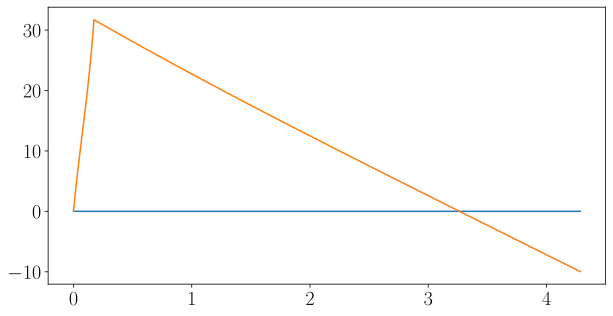

In [757]:
plt.plot(time_array_2[0][:5000], u_array[0][0, :5000])
plt.plot(time_array_2[0][:5000], u_array[0][1, :5000])

In [758]:
def make_data_combined(file_path):
    return pd.read_csv(
        file_path,
        sep=',',                # Ensure correct delimiter
        decimal='.',            # Handle decimal format
        encoding='utf-8',       # Adjust if needed
        # skiprows=0             # Skip non-data header rows
    )
# data_comb_1 = make_data_combined('../experiments/rocket/nov_28/t1/out/combined.csv')
if flag_t == 1:
    data_comb_1 = make_data_combined('../experiments/rocket/nov_28/t1/out/combined.csv')
elif flag_t == 2:
    data_comb_1 = make_data_combined('../experiments/rocket/nov_28/t2/out/combined.csv')
# data_comb_2 = make_data_combined('../experiments/rocket/nov_28/t2/out/combined.csv')
# data_comb_1.head()
time_1 = data_comb_1["t"].to_numpy()
track_z_1 = data_comb_1["track_z"].to_numpy()

# time_2 = data_comb_2["t"].to_numpy()
# track_z_2 = data_comb_2["track_z"].to_numpy()
# plt.plot(time_1, track_z_1)

In [759]:
u

array([[ 6.97989934e-06,  3.42549480e-03,  7.87200085e-03, ...,
         1.14148542e+01,  1.14146311e+01,  1.14144079e+01],
       [ 1.99878165e-04,  3.36382446e-02,  6.68895526e-02, ...,
        -1.85420825e+01, -1.85487209e+01, -1.85553591e+01]])

50.5028606316192


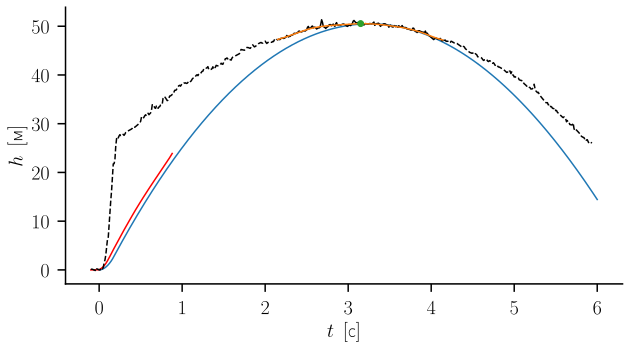

In [760]:
from scipy.ndimage import gaussian_filter

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
# plt.rcParams['text.latex.preamble'] = r'\boldmath'/
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]
# plt.rc('font', family='Times New Roman')

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax_width = 1.5
ax.spines['left'].set_linewidth(ax_width)
ax.spines['bottom'].set_linewidth(ax_width)
ax.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)


h_max = np.zeros(len(V_start))
flag_plot = 0
for j in range(len(V_start)):
    time = time_array_2[j]
    # x = np.zeros(len(time) - 1)
    u = u_array[j]
    u0_interp = interp1d(time, u[0], kind='linear')
    u1_interp = interp1d(time, u[1], kind='linear')
    def dx_dt(t, x):
        return np.array([u0_interp(t), u1_interp(t)])
    # for i in range(1, len(u) - 1):
    #     x[i] = x[i - 1] + (u[i + 1] + u[i]) / 2 * (time[i + 1] - time[i])

    # Начальные условия
    t0 = 0
    # x0 = 0
    
    # t_span = (t0, tau)
    # t_eval = np.linspace(t0, tau, N_step)
    t_span = (time.min(), time.max())
    t_eval = np.linspace(time.min(), time.max(), N_step)
    
    solution_x = solve_ivp(dx_dt, t_span, [0, 0], t_eval=t_eval, rtol=1e-6, atol=1e-9)

    h_max[j] = np.max(solution_x.y[1])
    print(h_max[j])
    if flag_plot == 0:
        stop_solution = stop_solution_array[j]
        plt.plot(solution_x.t[:], solution_x.y[1][:])

if flag_plot == 1:
    plt.plot(V_start * 1e3, h_max, 'o')
    plt.xlabel(r'$V_0\:\:[l]$')
    plt.ylabel(r'$h_{max}\:\:[m]$')

if flag_plot == 0:
    plt.xlabel('$t\\:\\:[\\text{с}]$')
    plt.ylabel('$h\\:\\:[\\text{м}]$')
# plt.grid(color='gainsboro')
# plt.plot(time_1+0.01, track_z_1, c="black")
# plt.plot(time_1+0.01, data_comb_1["h"], c="black")
plt.plot(time_1, track_z_1, c="red")


data_comb_1_filtered = gaussian_filter(data_comb_1["h"], sigma=10)
max_idx = np.abs(data_comb_1_filtered - data_comb_1_filtered.max()).argmin()
if flag_t == 1:
    plt.plot(time_1[:max_idx - 100], data_comb_1["h"][:max_idx - 100], c="black", linestyle='--')
    plt.plot(time_1[max_idx - 100:max_idx + 100], data_comb_1["h"][max_idx - 100:max_idx + 100], c="black")
    plt.plot(time_1[max_idx + 100:], data_comb_1["h"][max_idx + 100:], c="black", linestyle='--')
elif flag_t == 2:
    stop_bar = 510
    plt.plot(time_1[:stop_bar][:max_idx - 100], data_comb_1["h"][:stop_bar][:max_idx - 100], c="black", linestyle='--')
    plt.plot(time_1[:stop_bar][max_idx - 100:max_idx + 100], data_comb_1["h"][:stop_bar][max_idx - 100:max_idx + 100], c="black")
    plt.plot(time_1[:stop_bar][max_idx + 100:], data_comb_1["h"][:stop_bar][max_idx + 100:], c="black", linestyle='--')

# plt.plot(data_comb_1["t"], data_comb_1["camera_1_simple_z"]-data_comb_1["camera_1_simple_z"][0], c="red", linestyle="--")

plt.plot(time_1[max_idx - 100:max_idx + 100], data_comb_1_filtered[max_idx - 100:max_idx + 100])
plt.plot(time_1[max_idx], data_comb_1_filtered[max_idx], 'o')
# plt.xlim(-0.1, 7)
# plt.xlim(-0.1, 0.4)
# plt.ylim(0, 55)
# plt.ylim(0, 10)
# plt.plot(time_1, data_comb_1["camera_0_simple_z"] - data_comb_1["camera_0_simple_z"][0], c="black")
# plt.plot(time_1, data_comb_1["camera_1_simple_z"] - data_comb_1["camera_1_simple_z"][0], c="black")

plt.savefig("h_vs_t_1.svg", bbox_inches='tight')

(0.0, 40.0)

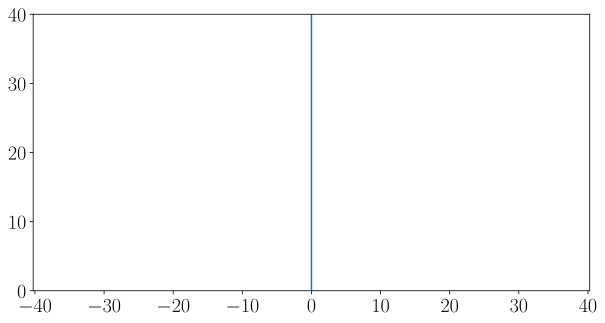

In [761]:
plt.gca().axis("equal")
plt.plot(solution_x.y[0], solution_x.y[1])
plt.ylim(0, 40)


In [289]:
Cd

0.7

In [290]:
mu

0.85

In [291]:
mu_8

0.7854703946956497

In [179]:
Cd

0.05

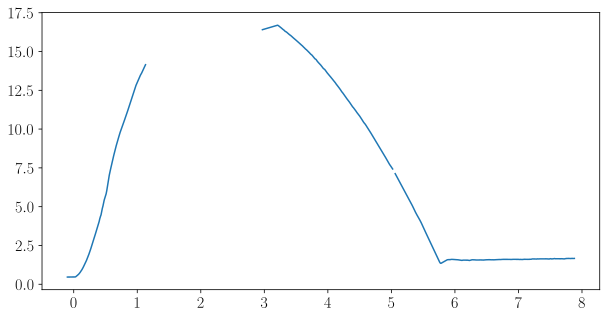

In [151]:
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         48 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  16
  On-line CPU(s) list:   0-15
Vendor ID:               AuthenticAMD
  Model name:            AMD Ryzen 7 8845HS w/ Radeon 780M Graphics
    CPU family:          25
    Model:               117
    Thread(s) per core:  2
    Core(s) per socket:  8
    Socket(s):           1
    Stepping:            2
    Frequency boost:     enabled
    CPU max MHz:         6679.6870
    CPU min MHz:         1600.0000
    BogoMIPS:            7585.31
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mc
                         a cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall n
                         x mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_go
                         od amd_lbr_v2 nopl nonstop_tsc cpuid extd_apicid aperfm
                         perf rapl pni pc

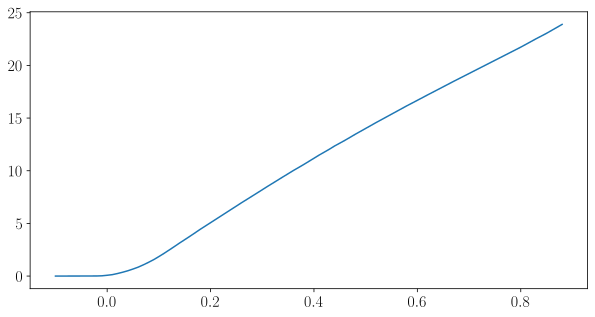

In [ ]:


T_1 = np.load('T.npy')
Vs_1 = np.load('Vs.npy')

plt.plot()